## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

# 1. Is the distribution normal?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1198eeb50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113ce0790>]], dtype=object)

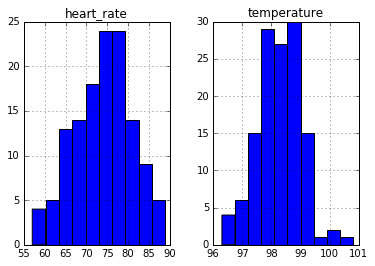

In [5]:
df.hist() #Looks pretty normal 

In [6]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [25]:
from scipy import stats # Just checking if its normal - it is.
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

## 2.  Is the true population mean really 98.6 degrees F?


In [23]:
m = df.temperature.mean() #Just looking at the sampling mean
m

98.24923076923078

In [20]:
s= df.temperature.std()
s

0.7331831580389454

#### The null hypothesis is that the population mean is 98.6 and the alternate hypothesis is that the population mean is different than 98.6.

In [24]:
#Since I don't know the population mean or stdev, but i have a sufficient sample size ( n >30) I can calculate 
# a z statistic using the sample stdev
numerator = m - 98.6

import math
denominator = s/math.sqrt(130)
z = numerator/denominator
z

-5.454823292364079

### This z-score falls outside of the range of a z table and has such means there is a very very high probability that we can reject the null hypothesis that the population body temperature mean is 98.6

In [27]:
# just to check the pvalue I will call a ztest

from statsmodels.stats.weightstats import ztest
ztest(df.temperature,value=98.6)  
#The second value below, the p-value is very very small so we were correct in rejecting the null hypothesis. 

(-5.4548232923645195, 4.9021570141012155e-08)

## 3.  At what temperature should we consider someone's temperature to be "abnormal"?
 - Start by computing the margin of error and confidence interval.

#### Margin of error = critical value (1.96 for 95% confidence interval) x standard error

In [29]:
me = 1.96 * denominator
me

0.12603665700226638

In [31]:
confidence_interval = [m-me,m+me]
confidence_interval 

[98.12319411222852, 98.37526742623304]

In [33]:
print "a temperature outside of %s would be abnormal" % confidence_interval

a temperature outside of [98.12319411222852, 98.37526742623304] would be abnormal


## 4.  Is there a significant difference between males and females in normal temperature?


In [36]:
males = df[df.gender == 'M']
females = df[df.gender == 'F'] #I've isolated the males and females into two separate data frames

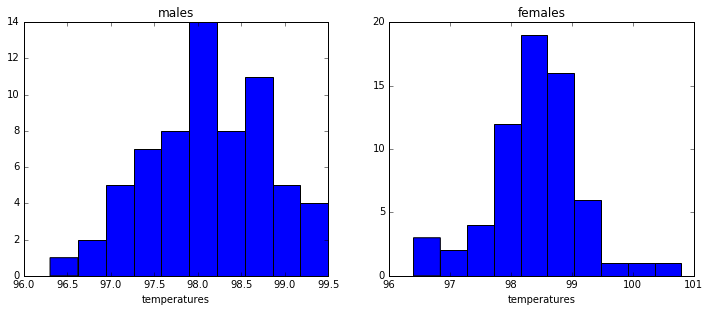

In [51]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(221)
ax.hist(males.temperature)
ax.set_title('males')
ax.set_xlabel('temperatures')

ax1 = fig.add_subplot(222)
ax1.hist(females.temperature)
ax1.set_title('females')
ax1.set_xlabel('temperatures')

In [56]:
stats.ttest_ind(males.temperature,females.temperature) 
#Chose a two sample ttest to test whether there is a significant difference between male & female temperatures.
#THe null hypothesis is that there is no different in means and the 
#alternate hypothesis is that the male temperature mean is not equal to the female hypothesis mean. 

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [57]:
males.temperature.mean()

98.1046153846154